# Decision Tree Exercise

- **Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from prepare import titanic_pipeline, telco_pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier

Found your sauce my bro
Found your sauce my bro
Found your sauce my bro


**1. What is your baseline prediction? What is your baseline accuracy?** *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*

In [2]:
train, val, test = titanic_pipeline()

Found your sauce my bro


In [3]:
train.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
748,0,male,19.0,1,0,53.1000,First,Southampton,0
45,0,male,29.0,0,0,8.0500,Third,Southampton,1
28,1,female,29.0,0,0,7.8792,Third,Queenstown,1
633,0,male,29.0,0,0,0.0000,First,Southampton,1
403,0,male,28.0,1,0,15.8500,Third,Southampton,0


In [4]:
train.shape

(623, 9)

In [5]:
val.shape

(134, 9)

In [6]:
# train = pd.get_dummies(train, columns = ['sex', 'class', 'embark_town'])
# train

# test = pd.get_dummies(test, columns = ['sex'], drop_first = True)
# test = pd.get_dummies(test, columns = ['class', 'embark_town'])
# test.head()

In [7]:
def one_hot_encode_columns(dataframes, columns_to_encode):
    encoded_dataframes = []
    
    for df in dataframes:
        encoded_df = pd.get_dummies(df, columns=columns_to_encode)
        encoded_dataframes.append(encoded_df)
    
    return encoded_dataframes

dataframes_to_encode = [train, val]
encoded_dataframes = one_hot_encode_columns(dataframes_to_encode, columns_to_encode=['sex', 'class', 'embark_town'])

train, val = encoded_dataframes

In [8]:
train.shape, val.shape

((623, 14), (134, 14))

In [9]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = val.drop(columns='survived')
y_val = val.survived

In [10]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [11]:
y_train == 0 #baseline

748     True
45      True
28     False
633     True
403     True
       ...  
476     True
190    False
736     True
462     True
136    False
Name: survived, Length: 623, dtype: bool

In [12]:
base_acc = (y_train == 0).mean()
base_acc

0.6163723916532905

**2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)**

In [13]:
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=seed)

clf = clf.fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
clf.feature_importances_

array([0.09522747, 0.01326607, 0.        , 0.05263329, 0.        ,
       0.65091629, 0.        , 0.05668045, 0.        , 0.13127644,
       0.        , 0.        , 0.        ])

In [15]:
X_train.columns

Index(['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_female', 'sex_male',
       'class_First', 'class_Second', 'class_Third', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [16]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [17]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.6375    , 0.3625    ],
       [0.88535032, 0.11464968],
       [0.21212121, 0.78787879],
       [0.6375    , 0.3625    ],
       [0.88535032, 0.11464968]])

In [18]:
y_pred_proba = clf.predict_proba(X_val)
y_pred_proba[:5]

array([[0.6375    , 0.3625    ],
       [0.88535032, 0.11464968],
       [0.88535032, 0.11464968],
       [0.6375    , 0.3625    ],
       [0.88535032, 0.11464968]])

In [19]:
clf.score(X_train, y_train)

0.8298555377207063

In [20]:
clf.score(X_val, y_val)

0.835820895522388

In [21]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 6):

    clf = DecisionTreeClassifier(max_depth=i, random_state = seed)

    clf.fit(X_train, y_train)

    depth.append(i)

    train_acc.append(clf.score(X_train, y_train))

    val_acc.append(clf.score(X_val, y_val))

In [22]:
tree = pd.DataFrame({'max_depth' : depth,
                      'train_acc' : train_acc,
                      'val_acc' : val_acc})
tree

,max_depth,train_acc,val_acc
0,2,0.807384,0.798507
1,3,0.829856,0.835821
2,4,0.845907,0.835821
3,5,0.863563,0.820896


**3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.**

In [23]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [24]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validation set: 0.82


In [25]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[370,  14],
       [ 92, 147]], dtype=int64)

In [26]:
y_train.value_counts()

survived
0    384
1    239
Name: count, dtype: int64

In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       384
           1       0.91      0.62      0.73       239

    accuracy                           0.83       623
   macro avg       0.86      0.79      0.80       623
weighted avg       0.84      0.83      0.82       623



**4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**

In [28]:
clf.score(X_train, y_train)

0.8635634028892456

In [29]:
clf.score(X_val, y_val)

0.8208955223880597

In [30]:
y_train = train.survived

import pandas as pd

labels = sorted(y_train.unique())

model = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

model.rename(
    columns={0: 'Died', 1: 'Survived'}, index={0: 'Died', 1: 'Survived'}, inplace=True,)

model

,Died,Survived
Died,370,14
Survived,92,147


**TP:** 147

**FP:** 14

**TN:** 370

**FN:** 92

**5. Run through steps 2-4 using a different max_depth value.**

In [31]:
seed = 42

clf = DecisionTreeClassifier(max_depth=9, random_state=seed)

clf = clf.fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=9, random_state=42)

In [32]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [33]:
clf.score(X_train, y_train)

0.9245585874799358

In [34]:
clf.score(X_val, y_val)

0.8134328358208955

In [35]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 6):

    clf = DecisionTreeClassifier(max_depth=i, random_state = seed)

    clf.fit(X_train, y_train)

    depth.append(i)

    train_acc.append(clf.score(X_train, y_train))

    val_acc.append(clf.score(X_val, y_val))

In [36]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [37]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validation set: 0.82


In [38]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.98      0.82      0.89       239

    accuracy                           0.92       623
   macro avg       0.94      0.90      0.92       623
weighted avg       0.93      0.92      0.92       623



In [39]:
y_train = train.survived

import pandas as pd

labels = sorted(y_train.unique())

model = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

model.rename(
    columns={0: 'Died', 1: 'Survived'}, index={0: 'Died', 1: 'Survived'}, inplace=True,)

model

,Died,Survived
Died,380,4
Survived,43,196


**6. Which model performs better on your in-sample data?**

- My second model performed better on my in-sample data.

**7. Which model performs best on your out-of-sample data, the $validate$ set?**

- My first model performed better on my out-of-sample data.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Part 2**

**1. Work through these same exercises using the Telco dataset.**

In [40]:
train, val, test = telco_pipeline()

Found your sauce my bro


In [41]:
train.dtypes

gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges             object
churn                     object
internet_service_type     object
contract_type             object
payment_type              object
dtype: object

In [42]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
5609,Male,0,No,No,14,Yes,No,No,No,Yes,No,No,No,No,76.45,1117.55,No,Fiber optic,Month-to-month,Electronic check
2209,Male,0,No,No,5,Yes,No,No,No,Yes,No,Yes,Yes,Yes,70.00,347.4,Yes,DSL,One year,Mailed check
6919,Male,0,Yes,No,35,Yes,Yes,No,No,No,No,No,No,Yes,75.20,2576.2,Yes,Fiber optic,Month-to-month,Electronic check
2284,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,86.10,4890.5,No,DSL,Two year,Electronic check
845,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,49.60,114.7,Yes,DSL,Month-to-month,Mailed check


In [43]:
 train.senior_citizen.value_counts()

senior_citizen
0    4137
1     793
Name: count, dtype: int64

In [44]:
def one_hot_encode_columns(dataframes, columns_to_encode):
    encoded_dataframes = []
    for df in dataframes:
        encoded_df = pd.get_dummies(df, columns=columns_to_encode)
        encoded_dataframes.append(encoded_df)
    return encoded_dataframes
dataframes_to_encode = [train, val]
encoded_dataframes = one_hot_encode_columns(dataframes_to_encode, columns_to_encode=['gender', 'partner', 'dependents', 'phone_service', 
                                                                                     'multiple_lines', 'online_security', 'online_backup', 
                                                                                     'device_protection', 'tech_support', 'streaming_tv', 
                                                                                     'streaming_movies', 'paperless_billing', 'churn',
                                                                                     'internet_service_type', 'contract_type', 'payment_type'])
train, val = encoded_dataframes

In [45]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5609,0,14,76.45,1117.55,False,True,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False
2209,0,5,70.00,347.4,False,True,True,False,True,False,...,True,True,False,False,True,False,False,False,False,True
6919,0,35,75.20,2576.2,False,True,False,True,True,False,...,True,False,True,True,False,False,False,False,True,False
2284,0,58,86.10,4890.5,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
845,0,2,49.60,114.7,True,False,True,False,True,False,...,True,True,False,True,False,False,False,False,False,True


In [46]:
# Replace various types of missing values with NaN
missing_values = ["", " ", "NA", "N/A", "nan", "NaN", "null", "None"]  # Add more if needed
train['total_charges'] = train['total_charges'].replace(missing_values, np.nan)
val['total_charges'] = val['total_charges'].replace(missing_values, np.nan)

# Convert column to numeric
train['total_charges'] = pd.to_numeric(train['total_charges'], errors='coerce')
val['total_charges'] = pd.to_numeric(val['total_charges'], errors='coerce')

# Calculate mode
train_mode_value = train['total_charges'].mode().iloc[0]
val_mode_value = val['total_charges'].mode().iloc[0]

# Fill NaN values with mode
train['total_charges'].fillna(train_mode_value, inplace=True)
val['total_charges'].fillna(val_mode_value, inplace=True)

In [47]:
check_for_nan = train['total_charges'].isnull().values.any()
print (check_for_nan)

False


In [48]:
count_nan_in_train = train.isnull().sum()
print (count_nan_in_train.head())

senior_citizen     0
tenure             0
monthly_charges    0
total_charges      0
gender_Female      0
dtype: int64


In [49]:
print("Number of NaN values in train['total_charges']: ", train['total_charges'].isna().sum())
print("Number of NaN values in val['total_charges']: ", val['total_charges'].isna().sum())

Number of NaN values in train['total_charges']:  0
Number of NaN values in val['total_charges']:  0


In [50]:
train.columns.tolist()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'churn_No',
 'churn_Yes',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'contract_type_Month-to-month',
 'contract_type_One 

In [51]:
def drop_cols(dataframes, columns_to_drop):
    
    for df in dataframes:
       
        df.drop(columns=columns_to_drop, inplace=True)

    
    return dataframes


dataframes_list = [train, val]  
columns_to_remove = ['gender_Female','partner_No',
 'dependents_No',
 'phone_service_No',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'online_security_No',
 'online_security_No internet service',
 'online_backup_No',
 'online_backup_No internet service',
 'device_protection_No',
 'device_protection_No internet service',
 'tech_support_No',
 'tech_support_No internet service',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'paperless_billing_No',
 'churn_No', 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)']  
modified_dataframes = drop_cols(dataframes_list, columns_to_remove)

In [52]:
train.shape, val.shape

((4930, 24), (1056, 24))

In [53]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Electronic check,payment_type_Mailed check
5609,0,14,76.45,1117.55,True,False,False,True,False,False,...,False,False,False,False,True,True,False,False,True,False
2209,0,5,70.00,347.40,True,False,False,True,False,False,...,True,True,True,True,False,False,True,False,False,True
6919,0,35,75.20,2576.20,True,True,False,True,True,False,...,False,True,True,False,True,True,False,False,True,False
2284,0,58,86.10,4890.50,True,True,False,True,True,True,...,True,True,False,True,False,False,False,True,True,False
845,0,2,49.60,114.70,False,False,False,True,False,False,...,False,True,True,True,False,True,False,False,False,True


In [54]:
train.columns.tolist()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [55]:
train = train.rename(columns={'churn_Yes' : 'churn'})
val = val.rename(columns={'churn_Yes' : 'churn'})

In [56]:
train.shape, val.shape

((4930, 24), (1056, 24))

In [57]:
X_train = train.drop(columns='churn')
y_train = train.churn

X_val = val.drop(columns='churn')
y_val = val.churn

In [58]:
train.shape, val.shape

((4930, 24), (1056, 24))

In [59]:
y_train.mode()

0    False
Name: churn, dtype: bool

In [60]:
y_train == 0

5609     True
2209    False
6919    False
2284     True
845     False
        ...  
4312     True
1501     True
6331     True
2739     True
5679     True
Name: churn, Length: 4930, dtype: bool

In [61]:
base_acc = (y_train == 0).mean()
base_acc

0.734685598377282

In [62]:
X_train.nunique()

senior_citizen                          2
tenure                                 73
monthly_charges                      1440
total_charges                        4646
gender_Male                             2
partner_Yes                             2
dependents_Yes                          2
phone_service_Yes                       2
multiple_lines_Yes                      2
online_security_Yes                     2
online_backup_Yes                       2
device_protection_Yes                   2
tech_support_Yes                        2
streaming_tv_Yes                        2
streaming_movies_Yes                    2
paperless_billing_Yes                   2
internet_service_type_DSL               2
internet_service_type_Fiber optic       2
contract_type_Month-to-month            2
contract_type_One year                  2
contract_type_Two year                  2
payment_type_Electronic check           2
payment_type_Mailed check               2
dtype: int64

In [63]:
seed = 42

clf = DecisionTreeClassifier(max_depth=5, random_state=seed)

clf = clf.fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=5, random_state=42)

- **Random Forest is an ensemble method that often performs better than a single Decision Tree. You can try Random Forest with default hyperparameters or tuned ones from the grid search.**

In [64]:
# clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=seed)
# clf.fit(X_train, y_train)

# clf

- **'GridSearchCV' to search for the best hyperparameters over a range of values. This can be especially useful for algorithms with many hyperparameters, like Decision Trees.**

In [65]:
# param_grid = {
#     'max_depth': range(2, 21),
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# clf = grid_search.best_estimator_

# param_grid, clf

In [66]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[:5]

array([ True, False,  True, False, False])

In [67]:
clf.score(X_train, y_train)

0.8075050709939148

In [68]:
clf.score(X_val, y_val)

0.8011363636363636

In [69]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 15):

    clf = DecisionTreeClassifier(max_depth=i, random_state = seed)

    clf.fit(X_train, y_train)

    depth.append(i)

    train_acc.append(clf.score(X_train, y_train))

    val_acc.append(clf.score(X_val, y_val))

In [70]:
tree = pd.DataFrame({'max_depth' : depth,
                      'train_acc' : train_acc,
                      'val_acc' : val_acc})
tree

,max_depth,train_acc,val_acc
0,2,0.762475,0.773674
1,3,0.792292,0.796402
2,4,0.794929,0.800189
3,5,0.807505,0.801136
4,6,0.813185,0.791667
5,7,0.825761,0.789773
6,8,0.844422,0.785985
7,9,0.867140,0.773674
8,10,0.884584,0.769886
9,11,0.905071,0.754735


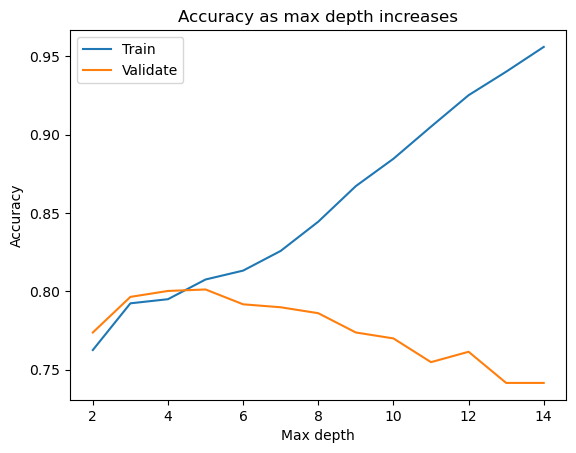

In [71]:
plt.plot(tree.max_depth, tree.train_acc, label = 'Train')
plt.plot(tree.max_depth, tree.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

In [72]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


In [73]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validation set: 0.74


In [74]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[3232,  390],
       [ 559,  749]], dtype=int64)

In [75]:
y_train = train.churn

import pandas as pd

labels = sorted(y_train.unique())

model = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

model.rename(
    columns={0: 'Not Churned', 1: 'Churned'}, index={0: 'Not Churned', 1: 'Churned'}, inplace=True,)

model

,Not Churned,Churned
Not Churned,3232,390
Churned,559,749


In [76]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      3622
        True       0.66      0.57      0.61      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.80      4930



8/11

- I believe i generalized the data well, but how could i improve the performance maybe i could do some hyperparameter tuning or additional feature engineer more.

In [77]:
train, val, test = telco_pipeline()

Found your sauce my bro


In [78]:
train.head(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
5609,Male,0,No,No,14,Yes,No,No,No,Yes,No,No,No,No,76.45,1117.55,No,Fiber optic,Month-to-month,Electronic check
2209,Male,0,No,No,5,Yes,No,No,No,Yes,No,Yes,Yes,Yes,70.00,347.4,Yes,DSL,One year,Mailed check
6919,Male,0,Yes,No,35,Yes,Yes,No,No,No,No,No,No,Yes,75.20,2576.2,Yes,Fiber optic,Month-to-month,Electronic check
2284,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,86.10,4890.5,No,DSL,Two year,Electronic check
845,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,49.60,114.7,Yes,DSL,Month-to-month,Mailed check


In [79]:
train = train.drop(columns=['contract_type', 'multiple_lines', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','internet_service_type', 'contract_type', 'payment_type'])

In [80]:
val = val.drop(columns=['contract_type', 'multiple_lines', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','internet_service_type', 'contract_type', 'payment_type'])

In [81]:
train.head()

,gender,senior_citizen,partner,dependents,phone_service,paperless_billing,monthly_charges,total_charges,churn
5609,Male,0,No,No,Yes,No,76.45,1117.55,No
2209,Male,0,No,No,Yes,Yes,70.00,347.4,Yes
6919,Male,0,Yes,No,Yes,Yes,75.20,2576.2,Yes
2284,Male,0,Yes,No,Yes,Yes,86.10,4890.5,No
845,Female,0,No,No,Yes,Yes,49.60,114.7,Yes


In [82]:
val.head()

,gender,senior_citizen,partner,dependents,phone_service,paperless_billing,monthly_charges,total_charges,churn
6910,Male,0,Yes,Yes,Yes,Yes,20.20,845.6,No
6044,Male,0,Yes,No,Yes,Yes,106.00,4178.65,No
2153,Male,0,Yes,Yes,Yes,No,25.55,1336.1,No
2089,Male,0,No,No,No,Yes,40.05,2799.75,No
6393,Female,0,No,No,Yes,Yes,96.60,291.9,Yes


In [83]:
def one_hot_encode_columns(dataframes, columns_to_encode):
    encoded_dataframes = []
    for df in dataframes:
        encoded_df = pd.get_dummies(df, columns=columns_to_encode)
        encoded_dataframes.append(encoded_df)
    return encoded_dataframes
dataframes_to_encode = [train, val]
encoded_dataframes = one_hot_encode_columns(dataframes_to_encode, columns_to_encode=['gender', 'partner', 'dependents', 'phone_service',
                                                                                     'paperless_billing','churn'])
train, val = encoded_dataframes

In [84]:
train.dtypes == 'object'

senior_citizen           False
monthly_charges          False
total_charges             True
gender_Female            False
gender_Male              False
partner_No               False
partner_Yes              False
dependents_No            False
dependents_Yes           False
phone_service_No         False
phone_service_Yes        False
paperless_billing_No     False
paperless_billing_Yes    False
churn_No                 False
churn_Yes                False
dtype: bool

In [85]:
# Replace various types of missing values with NaN
missing_values = ["", " ", "NA", "N/A", "nan", "NaN", "null", "None"]  # Add more if needed
train['total_charges'] = train['total_charges'].replace(missing_values, np.nan)
val['total_charges'] = val['total_charges'].replace(missing_values, np.nan)

# Convert column to numeric
train['total_charges'] = pd.to_numeric(train['total_charges'], errors='coerce')
val['total_charges'] = pd.to_numeric(val['total_charges'], errors='coerce')

# Calculate mode
train_mode_value = train['total_charges'].mode().iloc[0]
val_mode_value = val['total_charges'].mode().iloc[0]

# Fill NaN values with mode
train['total_charges'].fillna(train_mode_value, inplace=True)
val['total_charges'].fillna(val_mode_value, inplace=True)

In [86]:
train

,senior_citizen,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes
5609,0,76.45,1117.55,False,True,True,False,True,False,False,True,True,False,True,False
2209,0,70.00,347.40,False,True,True,False,True,False,False,True,False,True,False,True
6919,0,75.20,2576.20,False,True,False,True,True,False,False,True,False,True,False,True
2284,0,86.10,4890.50,False,True,False,True,True,False,False,True,False,True,True,False
845,0,49.60,114.70,True,False,True,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0,81.20,3292.30,False,True,False,True,False,True,False,True,False,True,True,False
1501,0,24.55,1331.05,False,True,False,True,False,True,False,True,True,False,True,False
6331,0,20.75,452.35,True,False,False,True,False,True,False,True,True,False,True,False
2739,0,24.70,571.75,True,False,False,True,False,True,False,True,True,False,True,False


In [87]:
train.columns.tolist()

['senior_citizen',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'churn_No',
 'churn_Yes']

In [88]:
train

,senior_citizen,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes
5609,0,76.45,1117.55,False,True,True,False,True,False,False,True,True,False,True,False
2209,0,70.00,347.40,False,True,True,False,True,False,False,True,False,True,False,True
6919,0,75.20,2576.20,False,True,False,True,True,False,False,True,False,True,False,True
2284,0,86.10,4890.50,False,True,False,True,True,False,False,True,False,True,True,False
845,0,49.60,114.70,True,False,True,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0,81.20,3292.30,False,True,False,True,False,True,False,True,False,True,True,False
1501,0,24.55,1331.05,False,True,False,True,False,True,False,True,True,False,True,False
6331,0,20.75,452.35,True,False,False,True,False,True,False,True,True,False,True,False
2739,0,24.70,571.75,True,False,False,True,False,True,False,True,True,False,True,False


In [89]:
def drop_cols(dataframes, columns_to_drop):
    
    for df in dataframes:
       
        df.drop(columns=columns_to_drop, inplace=True)

    return dataframes
    
dataframes_list = [train, val]

columns_to_remove = ['gender_Male', 'partner_No', 'dependents_No', 'phone_service_No', 'paperless_billing_No', 'churn_No'] 

modified_dataframes = drop_cols(dataframes_list, columns_to_remove)

In [90]:
train.shape, val.shape

((4930, 9), (1056, 9))

In [91]:
train = train.rename(columns={'churn_Yes' : 'churn'})
val = val.rename(columns={'churn_Yes' : 'churn'})

In [92]:
train.shape, val.shape

((4930, 9), (1056, 9))

In [93]:
X_train = train.drop(columns='churn')
y_train = train.churn

X_val = val.drop(columns='churn')
y_val = val.churn

In [94]:
train.shape, val.shape

((4930, 9), (1056, 9))

In [95]:
y_train.mode()

0    False
Name: churn, dtype: bool

In [96]:
y_train == 0

5609     True
2209    False
6919    False
2284     True
845     False
        ...  
4312     True
1501     True
6331     True
2739     True
5679     True
Name: churn, Length: 4930, dtype: bool

In [97]:
base_acc = (y_train == 0).mean()
base_acc

0.734685598377282

In [98]:
X_train.nunique()

senior_citizen              2
monthly_charges          1440
total_charges            4646
gender_Female               2
partner_Yes                 2
dependents_Yes              2
phone_service_Yes           2
paperless_billing_Yes       2
dtype: int64

In [99]:
seed = 42

clf = DecisionTreeClassifier(max_depth=4, random_state=seed)

clf = clf.fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=4, random_state=42)

In [100]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[:5]

array([ True,  True, False, False, False])

In [101]:
clf.score(X_train, y_train)

0.7939148073022312

In [102]:
clf.score(X_val, y_val)

0.8001893939393939

In [103]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 15):

    clf = DecisionTreeClassifier(max_depth=i, random_state = seed)

    clf.fit(X_train, y_train)

    depth.append(i)

    train_acc.append(clf.score(X_train, y_train))

    val_acc.append(clf.score(X_val, y_val))

In [104]:
tree = pd.DataFrame({'max_depth' : depth,
                      'train_acc' : train_acc,
                      'val_acc' : val_acc})
tree

,max_depth,train_acc,val_acc
0,2,0.770385,0.766098
1,3,0.772008,0.767045
2,4,0.793915,0.800189
3,5,0.801217,0.796402
4,6,0.807505,0.772727
5,7,0.820892,0.779356
6,8,0.836308,0.768939
7,9,0.853144,0.759470
8,10,0.868560,0.754735
9,11,0.885396,0.750947


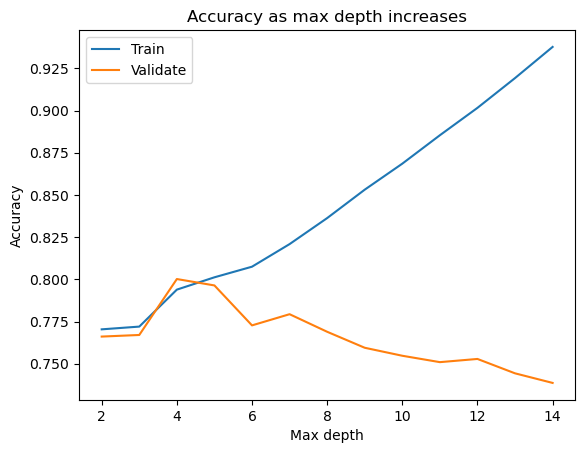

In [105]:
plt.plot(tree.max_depth, tree.train_acc, label = 'Train')
plt.plot(tree.max_depth, tree.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

In [106]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.94


In [107]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validation set: 0.74


In [108]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[3280,  342],
       [ 674,  634]], dtype=int64)

In [109]:
y_train = train.churn

import pandas as pd

labels = sorted(y_train.unique())

model = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

model.rename(
    columns={0: 'Not Churned', 1: 'Churned'}, index={0: 'Not Churned', 1: 'Churned'}, inplace=True,)

model

,Not Churned,Churned
Not Churned,3280,342
Churned,674,634


In [110]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.91      0.87      3622
        True       0.65      0.48      0.56      1308

    accuracy                           0.79      4930
   macro avg       0.74      0.70      0.71      4930
weighted avg       0.78      0.79      0.78      4930



8/13

- I dropped additional columns and filled 9 Nan vlaue ub the training data set and filled in one Nan value in the validation set.
- I also adjusted the max_depth of the decision tree and pruned as necessary to maintain generalized fit to the data, however I was only able to improve the recall and precision evaluation metric on both of my decision tree classifer models.
- I also implemented alternate algorithms and tuned the hyperparameter in each to measure each implementation's performance.
- I got a bigger improvement on my first model applying referenced changes.

- making adjustments to the dataset proved that the data is imbalanced and it's difficult to achieve optimal performance.
- I still would like to know how one would improve performance of the models without compromising how the model generalizes to the unseen portion of the data?